# Работа со звуком.
[Звук](https://ru.wikipedia.org/wiki/Звук)  это колебание воздуха (или другой среды). Колебания можно описать амплитудой (силой), частотой, формой колебания. Чтобы хранить и обрабатывать звук в компьютере его нужно "оцифровать" - перевести в последовательность чисел. Для этого каждую n-ую долю секунды измеряют амплитуду звука и записывают ее. То, как часто проводятся измерения амплитуды называется частотой дискретизации (частотой оцифровки). Человек слышит звуки частотой примерно от 20 Гц до 20 кГц (Гц - герц - одно колебание в секунду; кГц - килогерц - тысяча колебаний в секунду), поэтому ему достаточно для восприятия звуков, с частотой дискретизации 40кГц, но могут использоваться и другие [частоты дискретизации](https://ru.wikipedia.org/wiki/Частота_дискретизации). Звук меньшей чем 20Гц частоты мы практически не слышим, но он может оказывать воздействие на нас, такой звук называют инфразвуком, может вызывать неприятные чувства или даже боль. Звук большей чем 20кГц частоты называют ультразвуком, такой звук применяется в медицине, промышленности и др.

Мы будем говорить только о звуках, которые слышит человек. Шум, музыка, речь - все это звуки, разной формы, амплитуды, частоты.

Итак, звук в компьютере хранится как последовательность чисел, определяющая его амплитуду в каждый момент времени в зависимости от частоты дискретизации.
Надо различать частоту дискретизации - то как часто звук измерялся и записывался - и частоты самого звука - колебаний разной частоты которые присутствуют в звуке. Например звук может быть частотой 5кГц, но оцифрован с частотой 40кГц, это значит что на каждое колебание звука в последовательности будет по 8 чисел. Если в звуке только одна частота, то это чистый звук, но большинство звуков это смесь из звуков разной частоты. На рисунке показаны некоторые звуки (лай собаки, гудок автомобиля, музыка и др.)

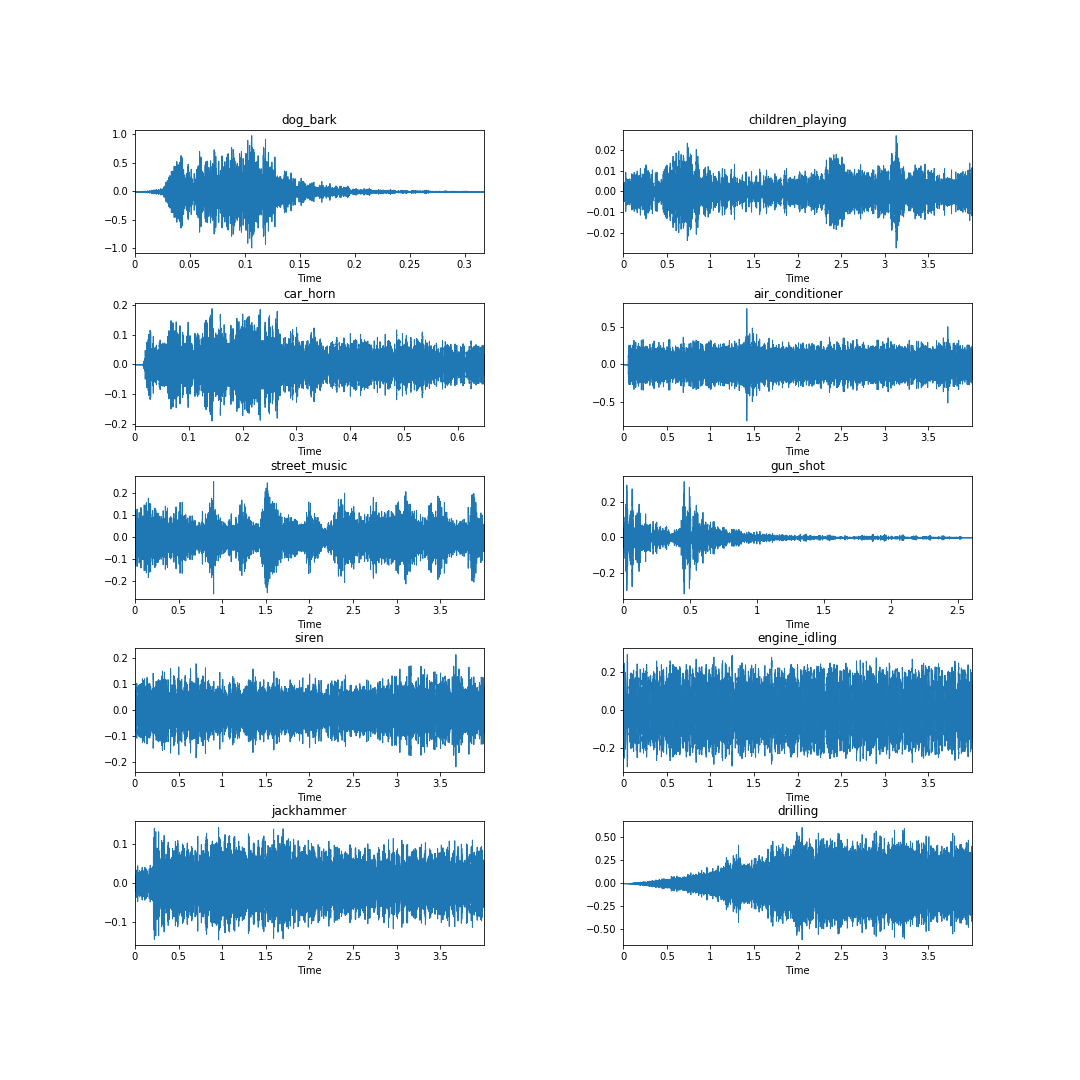

Для работы со звуком в Питон есть несколько хороших библиотек.

Мы попробуем разные библиотеки, какие-то проще, какие-то сложнее, но чем больше вы знаете вариантов, тем проще выбрать подходящий вам.

Чаще всего мы будем работать с форматом [__wav__](https://ru.wikipedia.org/wiki/WAV), поэтому сначала давайте научимся конвертировать другие форматы в wav.

## Работа с библиотекой `pydub`
Это можно сделать с помощью библиотеки [`pydub`](http://pydub.com/). Прежде чем с ней работать ее, конечно, нужно установить, также может потребоваться установить библиотеку [`ffmpeg`](http://www.ffmpeg.org/). ([Инструкция](https://ru.wikihow.com/%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%B8%D1%82%D1%8C-%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D1%83-FFmpeg-%D0%B2-Windows), примечание, если вы работаете из Anaconda, то ставьте библиотеку через `conda install`).

В `pydub` есть команда `AudioSegment`, которая позволяет загружать звуки из различных форматов  файла (указываем, какой) и превращает их в объект, с которым мы можем работать. Например, поменяем местами первую и вторую половину файла.

`AudioSegment.from_mp3()` загружаем из mp3 формата

Объект `sound` можно индексировать, как если бы это был массив, по одной миллисекунде.
`len()` скажет сколько миллисекунд занимает звук, найдем половину (целую часть).

Проиндексируем первую половину объекта `sound`:  `first_half=sound[:mid]`

Проиндексируем вторую половину объекта `sound`:  ` last_half=sound[mid:]`

И присоединим ко второй половине первую: `sound=last_half.append(first_half)`
По умолчанию, чтобы не было резких скачков звука, применяется эффект "склейки" (crossfade): в течении 100мс амплитуда одного  звука постепенно понижается, а второго увеличивается. Если это не нужно, то установите параметр  `crossfade=0`. Для метода append() можно использовать альтернативный синтаксис - оператор `+` .

Послушайте `test.wav` и убедитесь, что мы поменяли местами половинки `test.mp3`.

In [1]:
from pathlib import Path

data_dir = Path("../data")

In [2]:
from os import path # для работы с файлами
from pydub import AudioSegment # подключим библиотеку для работы со звуком

src = data_dir /'test.mp3' # исходный файл
dst = data_dir /'test.wav' # файл с результатом
#AudioSegment.converter='c:/Program Files/ffmpeg/bin/'
sound = AudioSegment.from_mp3(src) # загружаем из файла mp3
mid=int(len(sound)/2) # число миллисекунд в звуке деленное на 2 (целая часть)
print(mid)

e:\PyCharmProjects\aie-course-meta\.venv\Lib\site-packages\pydub\utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
e:\PyCharmProjects\aie-course-meta\.venv\Lib\site-packages\pydub\utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
e:\PyCharmProjects\aie-course-meta\.venv\Lib\site-packages\pydub\utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
e:\PyCharmProjects\aie-course-meta\.venv\Lib\site-packages\pydub\utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


ModuleNotFoundError: No module named 'pyaudioop'

In [ ]:
# меняем местами первую и вторую половину файла
first_half=sound[:mid] # первая половина
last_half=sound[mid:] # вторая половина
sound=last_half+first_half # объединяем их
#sound=last_half.append(first_half) # альтернативный синтаксис
sound.export(dst, format="wav") # записываем результат в файл

<_io.BufferedRandom name='ML_School/test.wav'>

Прослушаем звук с помощью команды `play()` из `pydub.playback` (не работает в Colab)

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_wav(data_dir /'test.wav')
play(sound) # не работает в Colab, пользуйтесь IPython

## Прослушивание звука в `IPython.display`
В Jupyter Notebook есть  встроенный (в `IPython.display`) проигрыватель мелодий (многих форматов, не только wav), очень удобно, когда надо послушать (метод `.Audio()`), что у нас получилось. Давайте сравним, что было и что получилось.

In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio(data_dir /'test.mp3') #было

In [ ]:
ipd.Audio(data_dir /'test.wav') #стало

## Работа с библиотекой `simpleaudio` . Создание звука.

В библиотеке [`simpleaudio`](https://simpleaudio.readthedocs.io/en/latest/index.html)  чтобы начать работу с аудио формата WAV, надо создать соответствующий объект, и потом, при помощи методов (названия интуитивно понятны, см. документацию), управлять им.

Команда `WaveObject.from_wave_file(filename)` создает такой объект из файла `filename`.

Запускаем воспроизведение методом  `.play()` .
Запущенное воспроизведение можно остановить досрочно, методом `.stop()`.

Но в Colab нет установленной звуковой платы, поэтому нам придется немного постраться, чтобы воспроизвести звук. Нам поможет IPython из предыдущего раздела, но чтобы им воспользоваться, надо перевести звук из формата PCM (байты), в котором он хранится в `WaveObject.audio_data` в массив типа float32. А также надо указывать частоту дискретизации в два раза больше, так как в PCM 16 бит, а в float32 - 32 бита на число. Частоту дискретизации узнаем из `WaveObject.sample_rate`.

Мы уже сделали такую функцию `byte_to_float()` и сохранили ее в утилитах.

In [ ]:
import simpleaudio as sa # подключаем библиотеку
import time # библиотека для работы со временем, для паузы
from ML_School.utils import byte_to_float

filename = "ML_School/test.wav" # исходный файл
wave_obj = sa.WaveObject.from_wave_file(filename) # создаем звуковой объект
#playing1 = wave_obj.play() # запускаем воспроизведение первый раз. Не работает в Colab
# Для Colab:
tmp=byte_to_float(wave_obj.audio_data) # конвертируем PCM в float
ipd.Audio(data=tmp,rate=2*wave_obj.sample_rate)# воспроизводим, частота в 2 раза больше.


### Создание простого звука в `simpleaudio`
Звук - последовательность чисел, амплитуд, давайте создадим свой звук,чистый синусоидальный. Для этого посчитаем амплитуды синуса заданной частоты в заданные моменты времени (отсчеты дискретизации).

Задаем параметры:
частота звука (в примере [440Гц](https://ru.wikipedia.org/wiki/A440)),
частота дискретизации (количество отсчетов (сэмплов) в секунду),
длительность звука (количество секунд).

**Пример ниже не работает в Colab, но работает на отдельном компьютере:** Ошибка "Error opening PCM device", нет установленной звуковой карты.

В `simpleaudio` для звука амплитуды должны быть 16-битными целыми числами в диапазоне плюс-минус $2^{15}-1$.
Масштабируем значения синуса до этого диапазона и конвертируем в 16-битные целые.

Воспроизведем полученный массив командой  `.play_buffer()` которой укажем  наш массив, количество каналов (=1), количество байт на один отсчет (2 байта = 16 бит) и частоту дискретизации `fs` . Обратите внимание, указав другую частоту дискретизации получите другой звук при воспроизведении, хотя хранится он будет также. Это позволяет ускорять\замедлять воспроизведение. Попробуйте задавать другие частоты дискретизации, 2*fs, int(fs/2) (должно быть целым).

Когда каналов больше одного, амплитуды для каждого канала хранятся попеременно, можно каждому каналу сопоставить свой звук. Количество каналов зависит от вашей воспроизводящей техники, обычно используется один канал (моно) или два (стерео).


In [ ]:
import numpy as np
import simpleaudio as sa

frequency = 440  # частота
fs = 44100  # частота дискретизации
seconds = 3  # длительность звука

# создаем массив значений времени от 0 до  seconds, количество элементов  seconds*fs
t = np.linspace(0, seconds, seconds * fs, False)

# Считаем амплитуду синусоидальной волны в заданные моменты времени,
# Помним, что волна задается по формуле sin(2*pi*f*t), f - частота, t - время.
note = np.sin(frequency * t * 2 * np.pi)
# Масштабируем к 16-bit диапазону
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Конвертируем в  16-bit данные
audio = audio.astype(np.int16)

# Воспроизводим
play_obj = sa.play_buffer(audio, 1, 2, fs) # попробуйте задавать другие частоты дискретизации, 2*fs, int(fs/2)...

SimpleaudioError: Error opening PCM device. -- CODE: -2 -- MSG: No such file or directory

In [ ]:
# Останавливаем, когда надоело
play_obj.stop()

NameError: name 'play_obj' is not defined

### Создание простого звука для `IPython`
Пример выше не работает в Colab. Давайте сделаем тоже самое через  `IPython`.


In [ ]:
import numpy as np
import IPython.display as ipd

frequency = 440  # частота
fs = 44100  # частота дискретизации
seconds = 3  # длительность звука

# создаем массив значений времени от 0 до  seconds, количество элементов  seconds*fs
t = np.linspace(0, seconds, seconds * fs, False)

# Считаем амплитуду синусоидальной волны в заданные моменты времени,
# Помним, что волна задается по формуле sin(2*pi*f*t), f - частота, t - время.
note = np.sin(frequency * t * 2 * np.pi)
# Масштабируем к диапазону -1...+1
audio = 2.*(note - np.min(note))/np.ptp(note)-1
# Воспроизводим
ipd.Audio(audio,rate=fs) # попробуйте задавать другие частоты дискретизации, 2*fs, int(fs/2)...

попробуйте самостоятельно сделать другие звуки, с другой частотой и другой формы, например смесь из синусоид разной частоты.

# Микрофон в Colab
Мы испытываем проблемы в работе со звуком в Colab, поскольку это виртуальная среда, тут нет установленных звуковых устройств и микрофонов. Вместо этого доступ к ним осуществяляется через браузер.

Попробуем получить доступ к микрофону. Это не просто, нам придется выполнять код на JavaScript. Поэтому просто используйте это, не вникая в код.

После мы приведем код для работы с микрофоном не из Colab, который будет работать на вашем компьютере, но не в Colab.



In [ ]:
# установка ffmpeg
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio # библиотеки для работы с HTML и воспроизведения звука
from google.colab.output import eval_js # для выполнения Javascript
from base64 import b64decode # для конвертирования звука в подходящий формат
import numpy as np
from scipy.io.wavfile import read as wav_read # для чтения wav файлов
import io # ввод\вывод
import ffmpeg # для работы с mpeg

#  код для получения записи микрофона в браузере
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON"); // кнопка начала записи
var t = document.createTextNode("Press to start recording"); // текст кнопки начала записи

my_btn.appendChild(t);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

// функция для создания потока аудио
var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };

  recorder = new MediaRecorder(stream); // интерфейс для записи
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start(); //начинаем запись
  };

recordButton.innerText = "Recording... press to stop"; // меняем текст кнопки

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

// включение\выключение записи
function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop(); // останавливаем запись
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!" // меняем текст кнопки
  }
}

// https://stackoverflow.com/a/951057

// пауза
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

// эти данные будут отправляться в Python
var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // ждем 2000ms доступности данных...

  resolve(base64data.toString())

});

}
});

</script>
"""
# функция получения записи
def get_audio():
  display(HTML(AUDIO_HTML)) # создаем HTML
  data = eval_js("data") # выполняем
  binary = b64decode(data.split(',')[1]) # переводим в байтовый вид
  # обработка
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  # байты надо расставить в правильном порядке для Wav
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  # читаем в Wav из буфера
  sr, audio = wav_read(io.BytesIO(riff))
  # sr - частота дискретизации
  # audio - звук в формате Wav.
  return audio, sr

Вызывая функцию get_audio() получим запись нашего микрофона и частоту дискретизации. Необходимо разрешить в браузере доступ к микрофону.

При вызове появится кнопка "Recording...press to stop", начинайте говорить, нажмите на эту кнопку, когда закончите.

In [ ]:
audio, sr = get_audio()

Теперь запись, а это массив numpy, можно сохранить в формате wav или обрабатывать. Попробуйте, например, изменить порядок элементов, начиная с последнего до первого.

In [ ]:
import scipy #
scipy.io.wavfile.write('recording.wav', sr, audio) # записываем в файл

In [ ]:
Audio(audio[::-1],rate=sr)

Для упражнения спойте песенку, запишите ее, обратите порядок элементов, и дайте послушать товарищам. Они должны угадать, какую песню вы спели.


#**Дальнейшие коды не работают в Colab**.
Используйте их на своем компьютере.

## Библиотека `pyaudio`. Воспроизведение

[`pyaudio`](http://people.csail.mit.edu/hubert/pyaudio/) еще одна библиотека для работы со звуком и позволяет работать с ним как с _потоком_, аналогично тому, как мы работали с файлами: открыть, прочитать\записать, закрыть. В отличии от файлов, которые создаются на жестком диске, звуковые потоки создаются для звуковых устройств (динамики, микрофоны и т.п.). Представление в виде потока может показаться сложным, но оно дает больший контроль над процессом записи\воспроизведения звука, можно обрабатывать его "на лету".

Для работы с библиотекой `pyaudio` ее нужно установить, также потребуется установить [`portaudio`](https://anaconda.org/anaconda/portaudio).

Для открытия WAV файла подключим библиотеку [`wave`](https://docs.python.org/3/library/wave.html) и откроем файл с помощью команды `wave.open()`, указав ей имя файла и способ открытия (чтение или запись, мы откроем на чтение).

Работа со звуком будет вестись в потоке кусочками (их называют кадры, фреймы, frame) заданной длины. Сначала мы инициализируем звуковую подсистему с помощью команды `pyaudio.PyAudio()`, она создаст "интерфейс", некий образ, звуковой подсистемы нашего компьютера, с которым мы и будем работать. После того как нам перестанет нужна эта подсистема, мы ее завершим, команда `pyaudio.terminate()`.

Инициализировав звуковую подсистему, мы можем открыть _поток_ командой `pyaudio.open()`, у нее много аргументов (см. [документацию](http://people.csail.mit.edu/hubert/pyaudio/docs/#pyaudio.Stream.__init__)), мы укажем:

`format` - формат чисел для представления звука: целые, дробные и т.п.
Чтобы узнать какой формат у нашего звукового файла воспользуемся командой `pyaudio.get_format_from_width(wf.getsampwidth())` , здесь команда `wave.getsampwidth()` - возвращает формат чисел, взятый из файла.

`channels` - число каналов звука, число каналов в потоке и в файле должно совпадать, чтоб узнать сколько их в файле вызовем команду `wave.getnchannels()`.

`rate` - частота дискретизации, чтобы файл воспроизвелся также как записан, частота дискретизации в потоке и в файле должна быть одинаковой, узнаем ее для файла: `wave.getframerate()` .

`output` - установим в истину (`true`), чтобы указать что это выходной поток, куда будет отправляться звук.

Поток открыт, теперь в него можно что-то записывать.

Прочитаем из файла кусочек данных командой `wave.readframes()`, которой укажем сколько кадров прочитать (это массив типа `bytes`).

Запишем эти данные в поток (метод `.write()`) и будем в цикле последовательно читать из файла и записывать в поток данные, пока они есть в файле. Когда все данные в файле будут прочитаны, при чтении вернется пустой массив `bytes` (`b''`) и мы выйдем из цикла.

Поток больше не нужен - закроем его, метод `.close()`, звуковая подсистема тоже больше не нужна - остановим ее, метод  `.terminate()`.


In [ ]:
import pyaudio
import wave

filename = data_dir /'test.wav'

# Длина кусочка данных
chunk = 1024

# Открываем файл
wf = wave.open(filename, 'rb')

# Инициализируем звуковую подсистему
p = pyaudio.PyAudio()

# Открываем поток на звуковом устройстве для записи в него звука
# 'output = True' - запись в поток (т.е. воспроизведение)
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# Читаем кусочек данных из файла
data = wf.readframes(chunk)

# В цикле пока хоть какие-то даннные из файла читаются (не пустой массив)
while data != b'':
    stream.write(data)# записываем в поток (воспроизводим) очередной кусочек данных из файла
    data=wf.readframes(chunk)# читаем следующий кусочек данных из файла

stream.close()# закрываем поток
p.terminate()# останавливаем звуковую подсистему

OSError: [Errno -9996] Invalid output device (no default output device)

## Запись звука, библиотека `sounddevice`
Для некоторых задач, например распознавание речи, нам может понадобиться делать записи с микрофона, обрабатывать и сохранять их.

Удобная библиотека [`sounddevice`](https://python-sounddevice.readthedocs.io/en/0.3.15/) позволяет нам записывать и воспроизводить звуки. Установим (называется python-sounddevice) и подключим ее. Для работы с WAV файлом воспользуемся библиотекой `scipy.io.wavfile` из которой подключим команду write для записи WAV-файла.  

Когда мы воспроизводим или записываем звук - нужно определиться с какого устройства в компьютере мы будем это делать, могут быть установлены разные устройства, настоящие и виртуальные. Чтобы узнать, какие звуковые устройства на вашем компьютере сейчас есть, вызовем команду  `sounddevice.query_devices()` . Она покажет устройства, их названия, параметры (число каналов записи и воспроизведения) и индекс. В командах записи\воспроизведения мы можем указать с каким именно устройством работать, указав его индекс. Если индекс устройства не укажем, то будет использовано устройство по умолчанию. Далее следует указывать для индекса устройства `device=...` индекс вашего устройства или удалить этот параметр вообще (по умолчанию).
Если запись не идет - убедитесь, что у вас подключен микрофон и что в `device=...` указан индекс именно этого микрофона.



In [ ]:
!pip install sounddevice

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write

In [ ]:
sd.query_devices() # Информация о звуковых устройствах.

Установим частоту дискретизации для записи, количество секунд, которые мы хотим записать с микрофона, количество каналов (должно совпадать с числом каналов на вашем микрофоне, часто 1).

Команда `sounddevice.rec()` записывает звук с выбранного устройства, мы указываем число фреймов для записи (равно числу секунд умножить на частоту дискретизации) , частоту дискретизации `samplerate= `, число каналов устройства `channels= ` и индекс устройства  `device= `. Замените на свои значения если не совпадает.

Управление сразу же возвращается в программу, нужно подождать конца записи, прежде чем что-то другое делать, вызываем `sounddevice.wait()`.

Дальше можем прослушать звук командой `sounddevice.play()`, которой указываем имя переменной со звуком (ту, что получили при записи) и частоту дискретизации. Помним, что можно указать другую частоту дискретизации для воспроизведения, тогда звук будет воспроизводиться  быстрее или медленнее. Попробуйте ускорить свой голос, такой прием часто применяют в мультфильмах, чтобы сделать детские голоса.

Запишем  звук в файл, команда `write()` из библиотеки `scipy.io.wavfile`, которой мы указываем название файла, частоту дискретизации для записи в файл (можем поменять) и имя переменной со звуком.

Прослушаем запись из файла с помощью уже известного нам `IPython.display.Audio`

Когда запустите код ниже не забудьте говорить в микрофон!

In [ ]:
fs = 44100  # частота дискретизации
seconds = 5  # Длительность записи в секундах
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1, device=2) # запись
sd.wait()  # ожидание конца записи
write(data_dir /'output.wav', fs, myrecording)  # Сохранение в WAV файл
sd.play(myrecording,fs*2)# воспроизведение в два раза быстрее чем записывали

In [ ]:
import IPython.display as ipd
ipd.Audio(data_dir /'output.wav') # воспроизведение из записанного файла

## Запись аудио с `pyaudio`

`pyaudio` может и записывать звук, в принципе тут подход такой же как и при воспроизведении, только в обратную сторону: сначала читаем из потока звук, а потом его записываем в файл.

In [ ]:
import pyaudio
import wave

chunk = 1024  # длина кусочка данных 1024
sample_format = pyaudio.paInt16  # формат чисел 16 битные целые, это название формата.
channels = 1 # число каналов на устройстве записи
fs = 44100  # частота дискретизации
seconds = 3 # длительность записи
input_device_index=2 # индекс устройства - микрофона. Поменяйте на свой.
filename = "ML_School/output.wav" # название файла

p = pyaudio.PyAudio()  # Инициализируем звуковую подсистему

print('Recording') #

# открываем поток, но теперь для записи из него:  input=True.
stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True,
                input_device_index=input_device_index)

frames = []  # Массив, куда будут записываться кусочки данных

# В цикле читаем из потока данные
# сколько раз? Если данных у нас на seconds=3 секунды, в каждой секунде по fs=44100 данных,
# а за один раз читаем   chunk=1024 данных, то нужно int(fs / chunk * seconds) раз прочитать наш поток.
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk) #читаем очередной кусочек данные
    data1=bytearray(data)
    frames.append(data)# добавляем (присоединяем) его к массиву


stream.stop_stream()# останавливаем поток
stream.close()# и закрываем его
p.terminate() # выключаем звуковую подсистему

print('Finished recording')

# Сохраняем в WAV файл
wf = wave.open(filename, 'wb') # открываем файл, режим для записи
wf.setnchannels(channels) # устанавливаем число каналов звука, которые будут в файле
wf.setsampwidth(p.get_sample_size(sample_format)) # устанавливаем для файла формат чисел (узнаем его с помощью p.get_sample_size())
wf.setframerate(fs) # устанавливаем для файла частоту дискретизации
wf.writeframes(b''.join(frames)) # записываем в файл данные
# чтобы писать в файл нужен тип bytes, так мы хитро сконвертировали наши данные в этот тип
# присоединив к пустой строке '' типа bytes массив frames
wf.close() # закрываем файл

ModuleNotFoundError: No module named 'pyaudio'

In [ ]:
ipd.Audio(data_dir /'output.wav') # прослушаем запись

Можно посмотреть свойства устройства по его индексу.

In [ ]:
 p.get_device_info_by_index(2) # указываем индекс устройства